# PROJECT BY: RITIK SURI

## The Sparks Foundation- Data Science & Business Analytics Intern

### TASK: Prediction using Unsupervised ML

- Problem statement is to make optimum number of clusters from 'Iris' dataset and represent it visually.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
url='https://raw.githubusercontent.com/ritik1704/Optimum_cluster_iris/main/Iris.csv'
df= pd.read_csv(url)

### Understanding the dataset

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 6)

In [7]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [8]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Visualizing the data

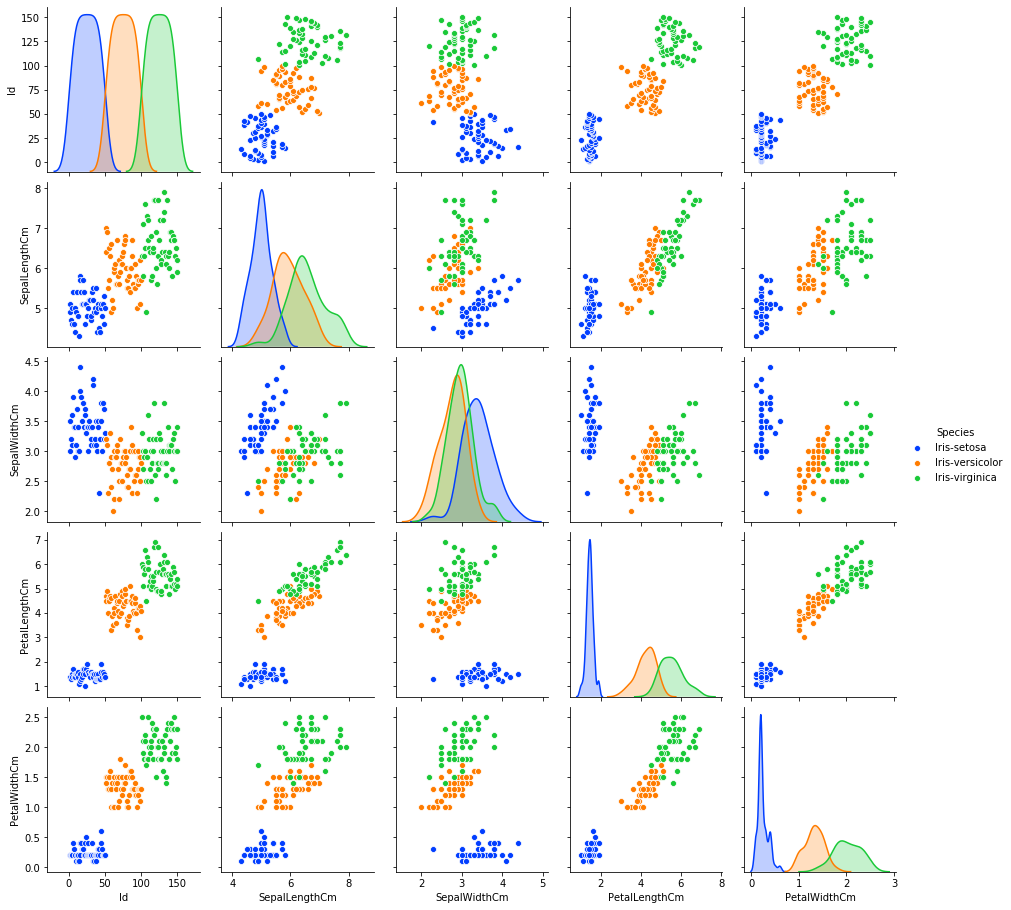

In [9]:
sns.pairplot(df,hue="Species", palette="bright")

In [10]:
df= df.drop(['Id','Species'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Finding outliers using boxplot

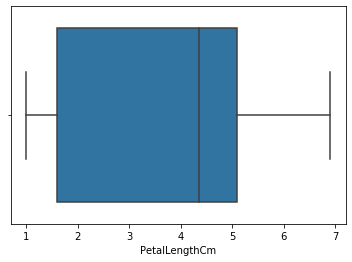

In [12]:
sns.boxplot(x=df['PetalLengthCm'],data=df)

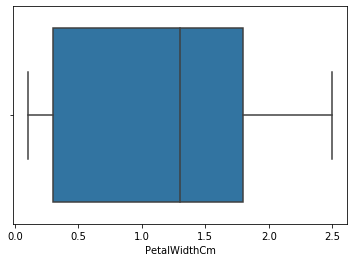

In [13]:
sns.boxplot(x=df['PetalWidthCm'],data=df)

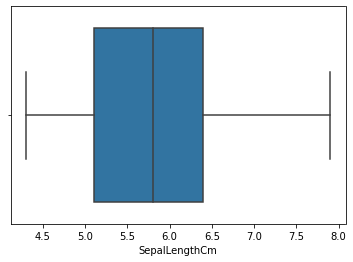

In [14]:
sns.boxplot(x=df['SepalLengthCm'],data=df)

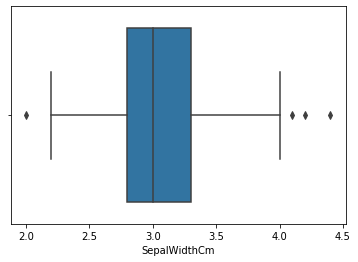

In [15]:
sns.boxplot(x=df['SepalWidthCm'],data=df)

#### Solving the outlier problem

In [16]:
q1 = df['SepalWidthCm'].quantile(0.01)
q2 = df['SepalWidthCm'].quantile(0.99)

df['SepalWidthCm'][df['SepalWidthCm']<=q1] = q1
df['SepalWidthCm'][df['SepalWidthCm']>=q2]= q2

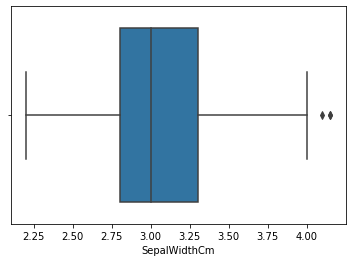

In [17]:
sns.boxplot(x=df['SepalWidthCm'],data=df)

In [18]:
df.shape

(150, 4)

In [19]:
X = df.iloc[:, [0,1,2,3]].values

In [20]:
X

array([[5.1  , 3.5  , 1.4  , 0.2  ],
       [4.9  , 3.   , 1.4  , 0.2  ],
       [4.7  , 3.2  , 1.3  , 0.2  ],
       [4.6  , 3.1  , 1.5  , 0.2  ],
       [5.   , 3.6  , 1.4  , 0.2  ],
       [5.4  , 3.9  , 1.7  , 0.4  ],
       [4.6  , 3.4  , 1.4  , 0.3  ],
       [5.   , 3.4  , 1.5  , 0.2  ],
       [4.4  , 2.9  , 1.4  , 0.2  ],
       [4.9  , 3.1  , 1.5  , 0.1  ],
       [5.4  , 3.7  , 1.5  , 0.2  ],
       [4.8  , 3.4  , 1.6  , 0.2  ],
       [4.8  , 3.   , 1.4  , 0.1  ],
       [4.3  , 3.   , 1.1  , 0.1  ],
       [5.8  , 4.   , 1.2  , 0.2  ],
       [5.7  , 4.151, 1.5  , 0.4  ],
       [5.4  , 3.9  , 1.3  , 0.4  ],
       [5.1  , 3.5  , 1.4  , 0.3  ],
       [5.7  , 3.8  , 1.7  , 0.3  ],
       [5.1  , 3.8  , 1.5  , 0.3  ],
       [5.4  , 3.4  , 1.7  , 0.2  ],
       [5.1  , 3.7  , 1.5  , 0.4  ],
       [4.6  , 3.6  , 1.   , 0.2  ],
       [5.1  , 3.3  , 1.7  , 0.5  ],
       [4.8  , 3.4  , 1.9  , 0.2  ],
       [5.   , 3.   , 1.6  , 0.2  ],
       [5.   , 3.4  , 1.6  , 0.4  ],
 

### Finding optimum clusters using elbow method

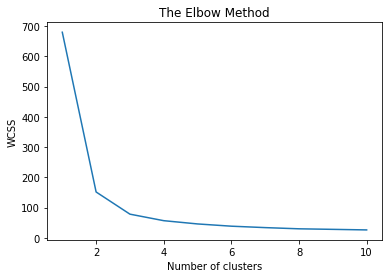

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### According to elbow method optimum clusters are 3

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the final cluster obtained

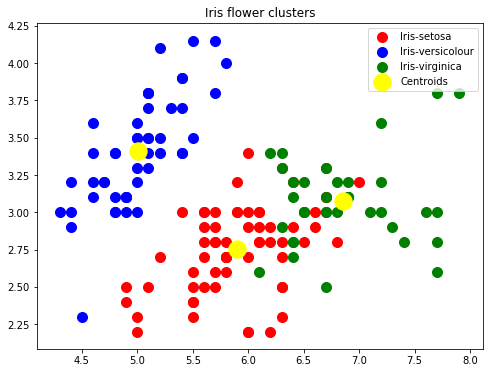

In [23]:
plt.figure(figsize = (8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Iris flower clusters')
plt.legend()
plt.show()